# 1、K-means Clustering

在这个练习中，您将实现K-means算法并将其用于图像压缩。通过减少图像中出现的颜色的数量，只剩下那些在图像中最常见的颜色。

## 1.1 Implementing K-means
### 1.1.1 Finding closest centroids
在K-means算法的分配簇的阶段，算法将每一个训练样本$x_i$分配给最接近的簇中心。

$$c^{(i)} := j $$ 
that minimizes
$$||x^{(i)} - μ_j||$$


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
def find_closest_centroids(X, centroids):
    """
    该函数接受数据矩阵X和聚类中心内所有中心的位置，并应输出一个一维数组idx，
    其中包含索引（值在{1，…， K}，其中K为距离每个训练样本最近中心的总数）。
    """
    idx = []
    max_dist = 1000000  # 限制一下最大距离
    for i in range(len(X)):
        minus = X[i] - centroids
        dist = minus[:, 0]**2 + minus[:, 1]**2
        if dist.min() < max_dist:
            ci = np.argmin(dist)  # numpy.argmin表示最小值在数组中所在的位置
            idx.append(ci)
    return np.array(idx)

In [10]:
mat = loadmat('ex7/ex7data2.mat')
X = mat['X']
init_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, init_centroids)
print(idx[0:3])

[0 2 1]


### 1.1.2 Computing centroid means
分配好每个点对应的簇中心，接下来要做的是，重新计算每个簇中心，为这个簇里面所有点位置的平均值。

$$μ_k := \frac{1}{|C_k|}\sum_{i \in C_k}x^{(i)}$$

$C_k$是我们分配好给簇中心点的样本集。

In [17]:
def compute_centroids(X, idx):
    centroids = []
    for i in range(len(np.unique(idx))): # len(np.unique(idx)) 为聚类中心的总数
        u_k = X[idx==i].mean(axis=0) # 求每列的平均值
        centroids.append(u_k)
    
    return np.array(centroids)

In [24]:
compute_centroids(X, idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 1.2 K-means on example dataset

In [65]:
def plot_data(X, centroids, idx=None):
    """
    可视化数据，并自动分开着色。
    idx: 最后一次迭代生成的idx向量，存储每个样本分配的簇中心点的值
    centroids: 包含每次中心点历史记录
    """
    colors = ['b','g','gold','darkorange','salmon','olivedrab', 
              'maroon', 'navy', 'sienna', 'tomato', 'lightgray', 'gainsboro'
             'coral', 'aliceblue', 'dimgray', 'mintcream', 'mintcream']
    
    assert len(centroids[0]) <= len(colors), 'colors not enough'
    
    sub_X = []
    if idx is not None:
        for i in range(centroids[0].shape[0]):
            x_i = X[idx == i]
            sub_X.append(x_i)
    else:
        sub_X = [X]
        
    plt.figure(figsize=(8,5))
    for i in range(len(sub_X)):
        xx = sub_X[i]
        plt.scatter(xx[:,0], xx[:,1], c=colors[i], label='Cluster {}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.xlabel('x1', fontsize=14)
    plt.ylabel('x2', fontsize=14)
    plt.title('Plot of X Points', fontsize=16)
    
    # 画出中心点的移动轨迹
    xx, yy = [], []
    for centroid in centroids:
        xx.append(centroid[:, 0])
        yy.append(centroid[:, 1])
    
    plt.plot(xx, yy, 'rx--', markersize=8)

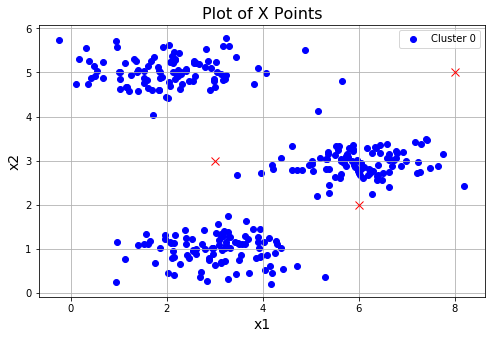

In [66]:
plot_data(X, [init_centroids])

In [67]:
def run_kmeans(X, centroids, max_iters):
    K = len(centroids)  # 中心点总数
    
    centroids_all = []
    centroids_all.append(centroids)
    centroid_i = centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroid_i)
        centroid_i = compute_centroids(X, idx)
        centroids_all.append(centroid_i)
    
    return idx, centroids_all

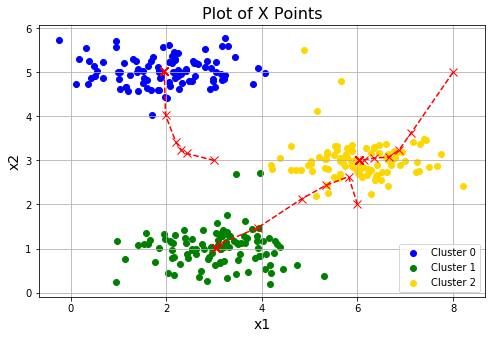

In [68]:
idx, centroids_all = run_kmeans(X, init_centroids, 20)
plot_data(X, centroids_all, idx)

In [76]:
centroids_all = []
centroids_all.append(init_centroids)
centroids_all

[array([[3, 3],
        [6, 2],
        [8, 5]])]

In [44]:
yy

[array([3, 2, 5])]